<a href="https://colab.research.google.com/github/shilz1007/shilz1007/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import PIL.Image
import os


In [2]:
path = '/content/drive/MyDrive/Images/Train'

In [3]:
image_height = 224
image_width = 224
batch_size = 50
train_images = tf.keras.preprocessing.image_dataset_from_directory(path,
                validation_split =0.2
                ,labels="inferred"
                ,subset = 'training'
                ,seed = 123
                ,image_size=(image_height,image_width)
                ,batch_size = batch_size )

Found 6000 files belonging to 2 classes.
Using 4800 files for training.


In [4]:
val_images = tf.keras.preprocessing.image_dataset_from_directory(path,
              validation_split = 0.2
              ,labels="inferred"
              ,subset='validation'
              ,seed=123
              ,image_size=(image_height,image_width)
              ,batch_size = batch_size)

Found 6000 files belonging to 2 classes.
Using 1200 files for validation.


['Fake', 'Real']


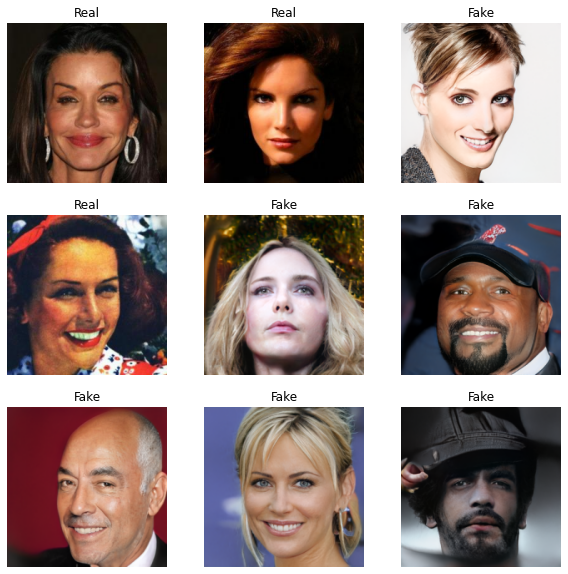

In [5]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print(class_names)


In [ ]:
#for image_batch in train_images:
#  print(image_batch.shape)
print(train_images)  
#print(labels_batch)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [6]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, 
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=2,
                    weights='imagenet')

for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

94781440/94765736 [==============================] - 1s 0us/step


In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


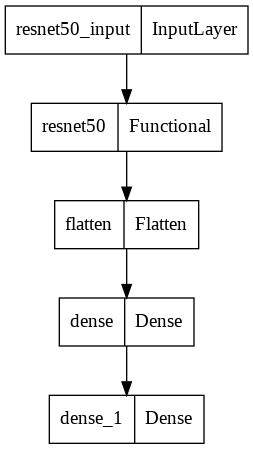

In [8]:
tf.keras.utils.plot_model(resnet_model)

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=resnet_model.fit(train_images,validation_data=val_images,epochs=10)

Epoch 1/10
96/96 [==============================] - 132s 1s/step - loss: 0.2297 - accuracy: 0.9083 - val_loss: 0.0732 - val_accuracy: 0.9742
Epoch 2/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0768 - val_accuracy: 0.9733
Epoch 3/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0533 - val_accuracy: 0.9842
Epoch 4/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0446 - accuracy: 0.9837 - val_loss: 0.1038 - val_accuracy: 0.9608
Epoch 5/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.0424 - val_accuracy: 0.9833
Epoch 6/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0382 - val_accuracy: 0.9817
Epoch 7/10
96/96 [==============================] - 6s 56ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0379 - val_accuracy: 0.9842
Epoch 8/10
96

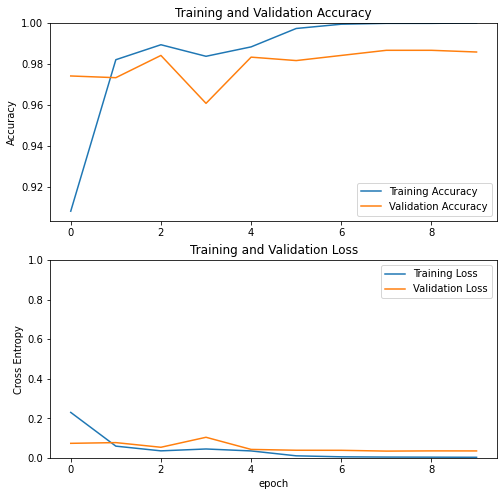

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
path_test = '/content/drive/MyDrive/Images/Test'

In [12]:
resnet_model.save('/content/drive/MyDrive/resnet_model_1.h5')

In [14]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(path_test
              ,labels="inferred"
              ,seed=123
              ,image_size=(image_height,image_width)
              ,batch_size = batch_size)

Found 101 files belonging to 2 classes.


['Fake', 'Real']


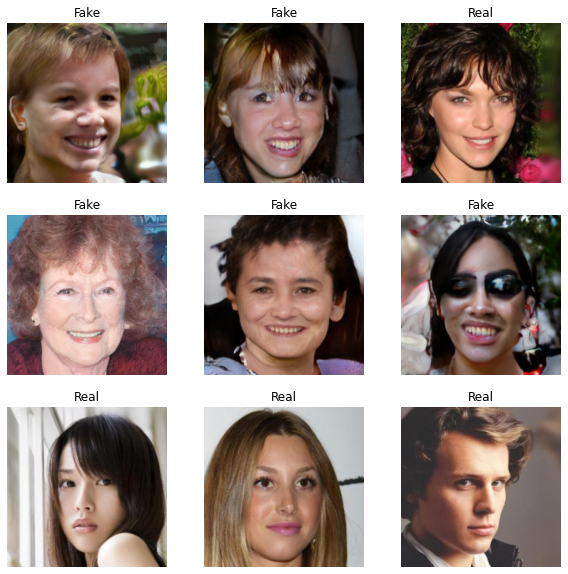

In [15]:
class_names = test_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in test_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print(class_names)

Predictions:
 [1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 0]
Labels:
 [1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 0]


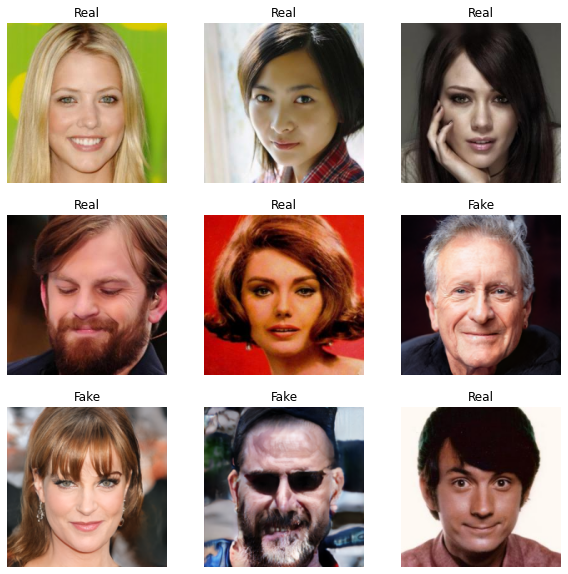

In [16]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_images.as_numpy_iterator().next()
predictions = resnet_model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
#predictions = tf.nn.sigmoid(predictions)
#predictions = tf.where(predictions < 0.5, 0, 1)
predictions = np.round(predictions)
predictions = predictions.astype(np.int32)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
#predictions = resnet_model.predict(x=test_images,steps=len(test_images),verbose=0)

In [17]:
#inceptionV3_model = Sequential()

pretrained_InceptionV3 = tf.keras.applications.InceptionV3(include_top=False, 
                    input_shape=(224,224,3),
                    #pooling='avg',
                    #classes=2,
                    weights='imagenet')

for layer in pretrained_InceptionV3.layers[:10]:
  layer.trainable=False

inceptionV3_model = pretrained_InceptionV3.output
inceptionV3_model = GlobalAveragePooling2D()(inceptionV3_model)
inceptionV3_model = Flatten()(inceptionV3_model)
inceptionV3_model = Dense(1024,activation='relu')(inceptionV3_model) 
inceptionV3_model = Dense(512,activation='relu')(inceptionV3_model) 
inceptionV3_model = Dense(128,activation='relu')(inceptionV3_model) 
inceptionV3_model = Dropout(0.4)(inceptionV3_model)
prediction = Dense(1,activation='sigmoid')(inceptionV3_model)
model2 = Model(inputs=pretrained_InceptionV3.inputs, outputs=prediction) 

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
model2.summary()

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
model_filepath = '/content/drive/MyDrive/inception-{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [25]:
checkpoint = ModelCheckpoint(filepath=model_filepath,monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [26]:
model2.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model2.fit(train_images,validation_data=val_images,epochs=50,callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4919
Epoch 1: val_accuracy improved from -inf to 0.48750, saving model to /content/drive/MyDrive/inception-01-0.4875.hdf5
96/96 [==============================] - 18s 119ms/step - loss: 0.6937 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 2/50
96/96 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5010
Epoch 2: val_accuracy did not improve from 0.48750
96/96 [==============================] - 9s 91ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 7.1321 - val_accuracy: 0.4867
Epoch 3/50
96/96 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5060
Epoch 3: val_accuracy did not improve from 0.48750
96/96 [==============================] - 9s 90ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 94.5558 - val_accuracy: 0.4867
Epoch 4/50
96/96 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4996
Epoch 4: val

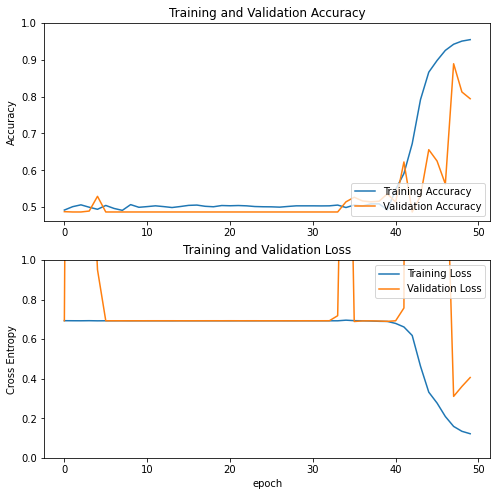

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

['Fake', 'Real']


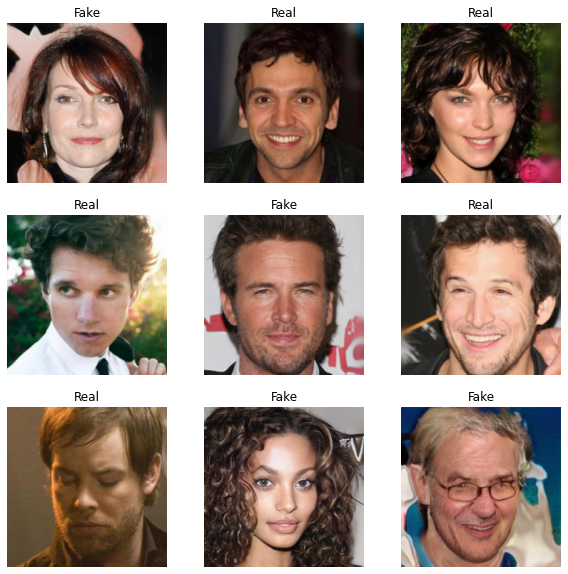

In [27]:
class_names = test_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in test_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
print(class_names)

Predictions:
 [1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1]
Labels:
 [0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 1 1 0 0]


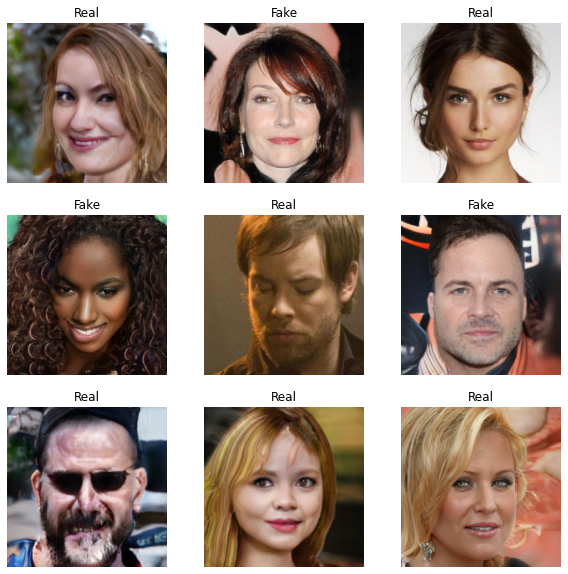

In [30]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_images.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
#predictions = tf.nn.sigmoid(predictions)
#predictions = tf.where(predictions < 0.5, 0, 1)
predictions = np.round(predictions)
predictions = predictions.astype(np.int32)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
#predictions = inceptionV3_model.predict(x=test_images,steps=len(test_images),verbose=0)

Ensemble

In [32]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Average

In [35]:
model_1 = load_model('/content/drive/MyDrive/resnet_model_1.h5')
model_1 = Model(inputs=model_1.inputs,outputs=model_1.outputs,name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/inception-48-0.8892.hdf5')
model_2 = model_1 = Model(inputs=model_2.inputs,outputs=model_2.outputs,name='name_of_model_2')
models = [model_1,model_2]
model_input = Input(shape=(224,224,3))
model_outputs=[model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input,outputs=ensemble_output,name='ensemble')

In [36]:
ensemble_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model_filepath = '/content/drive/MyDrive/ensemble-{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [41]:
checkpoint = ModelCheckpoint(filepath=model_filepath,monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [42]:
history=ensemble_model.fit(train_images,validation_data=val_images,epochs=30,callbacks=[checkpoint])

Epoch 1/30
96/96 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9952
Epoch 1: val_accuracy improved from -inf to 0.94667, saving model to /content/drive/MyDrive/ensemble-01-0.9467.hdf5
96/96 [==============================] - 16s 161ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.2927 - val_accuracy: 0.9467
Epoch 2/30
96/96 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9973
Epoch 2: val_accuracy did not improve from 0.94667
96/96 [==============================] - 14s 146ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 2.0044 - val_accuracy: 0.7200
Epoch 3/30
96/96 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996
Epoch 3: val_accuracy improved from 0.94667 to 0.98167, saving model to /content/drive/MyDrive/ensemble-03-0.9817.hdf5
96/96 [==============================] - 16s 161ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1217 - val_accuracy: 0.9817
Epoch 4/30
96/96 [==================